In [2]:
import pandas as pd
from distutils.version import StrictVersion
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

from pandasql import sqldf
dfsql = lambda q: sqldf(q, globals())

pd.set_option('display.max_columns', 500)
plt.rcParams['figure.figsize'] = [15,3]

In [3]:
df_raw = pd.read_parquet('./recent-export.parquet', engine='pyarrow')

In [4]:
df_raw['date'] = df_raw.gameCreation.dt.date

In [5]:
def nameFromSummonerId(x):
    if x == 73012371.0:
        return 'jokokoloko'
    elif x == 61079726.0:
        return 'Skeevo'
    elif x == 22928658.0:
        return 'iKledYouNot'
    elif x == 64811789.0:
        return 'Channsanity'
    elif x == 64983167.0:
        return 'Rudo'
    elif x == 23037187.0:
        return 'Fláy'
    elif x == 23455234.0:
        return 'BokuWaHenry'
    elif x == 23924232.0:
        return 'Sheldor'
    elif x == 24132946.0:
        return 'DrArchadium'
    elif x == 21411852.0:
        return 'Onishfu'
    elif x == 64739124.0:
        return 'AgileOverlord'
    return 'unknown'

In [6]:
def extractShortVersion(x):
    split_array = x.split('.')
    major = split_array[0]
    minor = split_array[1]
    if len(minor) < 2:
        minor = "0{num}".format(num=minor)
    return float("{major}.{minor}".format(major=major, minor=minor))

df_raw['shortVersion'] = df_raw.gameVersion.apply(extractShortVersion)
# df['ver'] = df['shortVersion'].apply(StrictVersion)

In [6]:
df_raw['win'] = df_raw.win.apply(lambda x: 1 if x == 'Win' else 0)

In [7]:
df_raw.groupby(['player.summonerId', 'player.summonerName'], sort=False, as_index=False).count().sort_values(by='gameCreation', ascending=False).head(n=20)

,player.summonerId,player.summonerName,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,platformId,queueId,seasonId,date,shortVersion,participantId,player.accountId,player.currentAccountId,player.currentPlatformId,player.matchHistoryUri,player.platformId,player.profileIcon,championId,highestAchievedSeasonTier,spell1Id,spell2Id,stats.assists,stats.champLevel,stats.combatPlayerScore,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.damageSelfMitigated,stats.deaths,stats.doubleKills,stats.firstBloodAssist,stats.firstBloodKill,stats.firstInhibitorAssist,stats.firstInhibitorKill,stats.firstTowerAssist,stats.firstTowerKill,stats.goldEarned,stats.goldSpent,stats.inhibitorKills,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.killingSprees,stats.kills,stats.largestCriticalStrike,stats.largestKillingSpree,stats.largestMultiKill,stats.longestTimeSpentLiving,stats.magicDamageDealt,stats.magicDamageDealtToChampions,stats.magicalDamageTaken,stats.neutralMinionsKilled,stats.neutralMinionsKilledEnemyJungle,stats.neutralMinionsKilledTeamJungle,stats.objectivePlayerScore,stats.participantId,stats.pentaKills,stats.perk0,stats.perk0Var1,stats.perk0Var2,stats.perk0Var3,stats.perk1,stats.perk1Var1,stats.perk1Var2,stats.perk1Var3,stats.perk2,stats.perk2Var1,stats.perk2Var2,stats.perk2Var3,stats.perk3,stats.perk3Var1,stats.perk3Var2,stats.perk3Var3,stats.perk4,stats.perk4Var1,stats.perk4Var2,stats.perk4Var3,stats.perk5,stats.perk5Var1,stats.perk5Var2,stats.perk5Var3,stats.perkPrimaryStyle,stats.perkSubStyle,stats.physicalDamageDealt,stats.physicalDamageDealtToChampions,stats.physicalDamageTaken,stats.playerScore0,stats.playerScore1,stats.playerScore2,stats.playerScore3,stats.playerScore4,stats.playerScore5,stats.playerScore6,stats.playerScore7,stats.playerScore8,stats.playerScore9,stats.quadraKills,stats.sightWardsBoughtInGame,stats.timeCCingOthers,stats.totalDamageDealt,stats.totalDamageDealtToChampions,stats.totalDamageTaken,stats.totalHeal,stats.totalMinionsKilled,stats.totalPlayerScore,stats.totalScoreRank,stats.totalTimeCrowdControlDealt,stats.totalUnitsHealed,stats.tripleKills,stats.trueDamageDealt,stats.trueDamageDealtToChampions,stats.trueDamageTaken,stats.turretKills,stats.unrealKills,stats.visionScore,stats.visionWardsBoughtInGame,stats.wardsKilled,stats.wardsPlaced,stats.win,teamId,timeline.creepsPerMinDeltas.0-10,timeline.creepsPerMinDeltas.10-20,timeline.creepsPerMinDeltas.20-30,timeline.creepsPerMinDeltas.30-end,timeline.csDiffPerMinDeltas.0-10,timeline.csDiffPerMinDeltas.10-20,timeline.csDiffPerMinDeltas.20-30,timeline.csDiffPerMinDeltas.30-end,timeline.damageTakenDiffPerMinDeltas.0-10,timeline.damageTakenDiffPerMinDeltas.10-20,timeline.damageTakenDiffPerMinDeltas.20-30,timeline.damageTakenDiffPerMinDeltas.30-end,timeline.damageTakenPerMinDeltas.0-10,timeline.damageTakenPerMinDeltas.10-20,timeline.damageTakenPerMinDeltas.20-30,timeline.damageTakenPerMinDeltas.30-end,timeline.goldPerMinDeltas.0-10,timeline.goldPerMinDeltas.10-20,timeline.goldPerMinDeltas.20-30,timeline.goldPerMinDeltas.30-end,timeline.lane,timeline.participantId,timeline.role,timeline.xpDiffPerMinDeltas.0-10,timeline.xpDiffPerMinDeltas.10-20,timeline.xpDiffPerMinDeltas.20-30,timeline.xpDiffPerMinDeltas.30-end,timeline.xpPerMinDeltas.0-10,timeline.xpPerMinDeltas.10-20,timeline.xpPerMinDeltas.20-30,timeline.xpPerMinDeltas.30-end,baronKills,dominionVictoryScore,dragonKills,firstBaron,firstBlood,firstDragon,firstInhibitor,firstRiftHerald,firstTower,inhibitorKills,riftHeraldKills,towerKills,vilemawKills,win,countnumber
3,73012371,jokokoloko,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,73,73,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,9

In [14]:
df = df_raw[
    (
        (df_raw['player.summonerId'] == 73012371.0) |
        (df_raw['player.summonerId'] == 23455234.0) |
        (df_raw['player.summonerId'] == 61079726.0) |
        (df_raw['player.summonerId'] == 23037187.0) |
        (df_raw['player.summonerId'] == 64983167.0) |
        
        (df_raw['player.summonerId'] == 22928658.0) |
        (df_raw['player.summonerId'] == 64811789.0) |
        (df_raw['player.summonerId'] == 21411852.0) |
        (df_raw['player.summonerId'] == 64739124.0) |
        (df_raw['player.summonerId'] == 23924232.0) |
        (df_raw['player.summonerId'] == 24132946.0) |
        (df_raw['player.summonerId'] == 64800284.0)
    ) &
    (
        (df_raw['queueId'] == 400) |
        (df_raw['queueId'] == 420) |
        (df_raw['queueId'] == 440)
    )
]

In [15]:
df_normal = df_raw[
    (
        (df_raw['player.summonerId'] == 73012371.0) |
        (df_raw['player.summonerId'] == 23455234.0) |
        (df_raw['player.summonerId'] == 61079726.0) |
        (df_raw['player.summonerId'] == 23037187.0) |
        (df_raw['player.summonerId'] == 64983167.0) |
        
        (df_raw['player.summonerId'] == 22928658.0) |
        (df_raw['player.summonerId'] == 64811789.0) |
        (df_raw['player.summonerId'] == 21411852.0) |
        (df_raw['player.summonerId'] == 64739124.0) |
        (df_raw['player.summonerId'] == 23924232.0) |
        (df_raw['player.summonerId'] == 24132946.0) |
        (df_raw['player.summonerId'] == 64800284.0)
    ) &
    (
        (df_raw['queueId'] == 400)
    )
]

In [16]:
df_ranked = df_raw[
    (
        (df_raw['player.summonerId'] == 73012371.0) |
        (df_raw['player.summonerId'] == 23455234.0) |
        (df_raw['player.summonerId'] == 61079726.0) |
        (df_raw['player.summonerId'] == 23037187.0) |
        (df_raw['player.summonerId'] == 64983167.0) |
        
        (df_raw['player.summonerId'] == 22928658.0) |
        (df_raw['player.summonerId'] == 64811789.0) |
        (df_raw['player.summonerId'] == 21411852.0) |
        (df_raw['player.summonerId'] == 64739124.0) |
        (df_raw['player.summonerId'] == 23924232.0) |
        (df_raw['player.summonerId'] == 24132946.0) |
        (df_raw['player.summonerId'] == 64800284.0)
    ) &
    (
        (df_raw['queueId'] == 420) |
        (df_raw['queueId'] == 440)
    )
]

In [17]:
df.head()

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,platformId,queueId,seasonId,date,shortVersion,participantId,player.accountId,player.currentAccountId,player.currentPlatformId,player.matchHistoryUri,player.platformId,player.profileIcon,player.summonerId,player.summonerName,championId,highestAchievedSeasonTier,spell1Id,spell2Id,stats.assists,stats.champLevel,stats.combatPlayerScore,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.damageSelfMitigated,stats.deaths,stats.doubleKills,stats.firstBloodAssist,stats.firstBloodKill,stats.firstInhibitorAssist,stats.firstInhibitorKill,stats.firstTowerAssist,stats.firstTowerKill,stats.goldEarned,stats.goldSpent,stats.inhibitorKills,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.killingSprees,stats.kills,stats.largestCriticalStrike,stats.largestKillingSpree,stats.largestMultiKill,stats.longestTimeSpentLiving,stats.magicDamageDealt,stats.magicDamageDealtToChampions,stats.magicalDamageTaken,stats.neutralMinionsKilled,stats.neutralMinionsKilledEnemyJungle,stats.neutralMinionsKilledTeamJungle,stats.objectivePlayerScore,stats.participantId,stats.pentaKills,stats.perk0,stats.perk0Var1,stats.perk0Var2,stats.perk0Var3,stats.perk1,stats.perk1Var1,stats.perk1Var2,stats.perk1Var3,stats.perk2,stats.perk2Var1,stats.perk2Var2,stats.perk2Var3,stats.perk3,stats.perk3Var1,stats.perk3Var2,stats.perk3Var3,stats.perk4,stats.perk4Var1,stats.perk4Var2,stats.perk4Var3,stats.perk5,stats.perk5Var1,stats.perk5Var2,stats.perk5Var3,stats.perkPrimaryStyle,stats.perkSubStyle,stats.physicalDamageDealt,stats.physicalDamageDealtToChampions,stats.physicalDamageTaken,stats.playerScore0,stats.playerScore1,stats.playerScore2,stats.playerScore3,stats.playerScore4,stats.playerScore5,stats.playerScore6,stats.playerScore7,stats.playerScore8,stats.playerScore9,stats.quadraKills,stats.sightWardsBoughtInGame,stats.timeCCingOthers,stats.totalDamageDealt,stats.totalDamageDealtToChampions,stats.totalDamageTaken,stats.totalHeal,stats.totalMinionsKilled,stats.totalPlayerScore,stats.totalScoreRank,stats.totalTimeCrowdControlDealt,stats.totalUnitsHealed,stats.tripleKills,stats.trueDamageDealt,stats.trueDamageDealtToChampions,stats.trueDamageTaken,stats.turretKills,stats.unrealKills,stats.visionScore,stats.visionWardsBoughtInGame,stats.wardsKilled,stats.wardsPlaced,stats.win,teamId,timeline.creepsPerMinDeltas.0-10,timeline.creepsPerMinDeltas.10-20,timeline.creepsPerMinDeltas.20-30,timeline.creepsPerMinDeltas.30-end,timeline.csDiffPerMinDeltas.0-10,timeline.csDiffPerMinDeltas.10-20,timeline.csDiffPerMinDeltas.20-30,timeline.csDiffPerMinDeltas.30-end,timeline.damageTakenDiffPerMinDeltas.0-10,timeline.damageTakenDiffPerMinDeltas.10-20,timeline.damageTakenDiffPerMinDeltas.20-30,timeline.damageTakenDiffPerMinDeltas.30-end,timeline.damageTakenPerMinDeltas.0-10,timeline.damageTakenPerMinDeltas.10-20,timeline.damageTakenPerMinDeltas.20-30,timeline.damageTakenPerMinDeltas.30-end,timeline.goldPerMinDeltas.0-10,timeline.goldPerMinDeltas.10-20,timeline.goldPerMinDeltas.20-30,timeline.goldPerMinDeltas.30-end,timeline.lane,timeline.participantId,timeline.role,timeline.xpDiffPerMinDeltas.0-10,timeline.xpDiffPerMinDeltas.10-20,timeline.xpDiffPerMinDeltas.20-30,timeline.xpDiffPerMinDeltas.30-end,timeline.xpPerMinDeltas.0-10,timeline.xpPerMinDeltas.10-20,timeline.xpPerMinDeltas.20-30,timeline.xpPerMinDeltas.30-end,baronKills,dominionVictoryScore,dragonKills,firstBaron,firstBlood,firstDragon,firstInhibitor,firstRiftHerald,firstTower,inhibitorKills,riftHeraldKills,towerKills,vilemawKills,win,countnumber
2,2018-10-12 06:08:41.227,2586,2885438100,CLASSIC,MATCHED_GAME,8.20.248.3196,11,NA1,400,11,2018-10-12,8.20,3,218766345,218766345,NA1,/v1/stats/player_history/NA1/218766345,NA1,3776,61079726,Skeevo,19,BRONZE,4,11,12,18,0,22382,1467,35657,6,0,False,False,False,False,False,False,14005,13175,0,1401,3748,3047,3742,3065,1042,3340,0,4,0,0,1,809,70952,10402,26755,134,4,90,0,3,0,8005,2903,2008,8

In [18]:
df.groupby(['player.summonerId', 'player.summonerName'], sort=False, as_index=False).count().sort_values(by='gameCreation', ascending=False)

,player.summonerId,player.summonerName,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,platformId,queueId,seasonId,date,shortVersion,participantId,player.accountId,player.currentAccountId,player.currentPlatformId,player.matchHistoryUri,player.platformId,player.profileIcon,championId,highestAchievedSeasonTier,spell1Id,spell2Id,stats.assists,stats.champLevel,stats.combatPlayerScore,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.damageSelfMitigated,stats.deaths,stats.doubleKills,stats.firstBloodAssist,stats.firstBloodKill,stats.firstInhibitorAssist,stats.firstInhibitorKill,stats.firstTowerAssist,stats.firstTowerKill,stats.goldEarned,stats.goldSpent,stats.inhibitorKills,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.killingSprees,stats.kills,stats.largestCriticalStrike,stats.largestKillingSpree,stats.largestMultiKill,stats.longestTimeSpentLiving,stats.magicDamageDealt,stats.magicDamageDealtToChampions,stats.magicalDamageTaken,stats.neutralMinionsKilled,stats.neutralMinionsKilledEnemyJungle,stats.neutralMinionsKilledTeamJungle,stats.objectivePlayerScore,stats.participantId,stats.pentaKills,stats.perk0,stats.perk0Var1,stats.perk0Var2,stats.perk0Var3,stats.perk1,stats.perk1Var1,stats.perk1Var2,stats.perk1Var3,stats.perk2,stats.perk2Var1,stats.perk2Var2,stats.perk2Var3,stats.perk3,stats.perk3Var1,stats.perk3Var2,stats.perk3Var3,stats.perk4,stats.perk4Var1,stats.perk4Var2,stats.perk4Var3,stats.perk5,stats.perk5Var1,stats.perk5Var2,stats.perk5Var3,stats.perkPrimaryStyle,stats.perkSubStyle,stats.physicalDamageDealt,stats.physicalDamageDealtToChampions,stats.physicalDamageTaken,stats.playerScore0,stats.playerScore1,stats.playerScore2,stats.playerScore3,stats.playerScore4,stats.playerScore5,stats.playerScore6,stats.playerScore7,stats.playerScore8,stats.playerScore9,stats.quadraKills,stats.sightWardsBoughtInGame,stats.timeCCingOthers,stats.totalDamageDealt,stats.totalDamageDealtToChampions,stats.totalDamageTaken,stats.totalHeal,stats.totalMinionsKilled,stats.totalPlayerScore,stats.totalScoreRank,stats.totalTimeCrowdControlDealt,stats.totalUnitsHealed,stats.tripleKills,stats.trueDamageDealt,stats.trueDamageDealtToChampions,stats.trueDamageTaken,stats.turretKills,stats.unrealKills,stats.visionScore,stats.visionWardsBoughtInGame,stats.wardsKilled,stats.wardsPlaced,stats.win,teamId,timeline.creepsPerMinDeltas.0-10,timeline.creepsPerMinDeltas.10-20,timeline.creepsPerMinDeltas.20-30,timeline.creepsPerMinDeltas.30-end,timeline.csDiffPerMinDeltas.0-10,timeline.csDiffPerMinDeltas.10-20,timeline.csDiffPerMinDeltas.20-30,timeline.csDiffPerMinDeltas.30-end,timeline.damageTakenDiffPerMinDeltas.0-10,timeline.damageTakenDiffPerMinDeltas.10-20,timeline.damageTakenDiffPerMinDeltas.20-30,timeline.damageTakenDiffPerMinDeltas.30-end,timeline.damageTakenPerMinDeltas.0-10,timeline.damageTakenPerMinDeltas.10-20,timeline.damageTakenPerMinDeltas.20-30,timeline.damageTakenPerMinDeltas.30-end,timeline.goldPerMinDeltas.0-10,timeline.goldPerMinDeltas.10-20,timeline.goldPerMinDeltas.20-30,timeline.goldPerMinDeltas.30-end,timeline.lane,timeline.participantId,timeline.role,timeline.xpDiffPerMinDeltas.0-10,timeline.xpDiffPerMinDeltas.10-20,timeline.xpDiffPerMinDeltas.20-30,timeline.xpDiffPerMinDeltas.30-end,timeline.xpPerMinDeltas.0-10,timeline.xpPerMinDeltas.10-20,timeline.xpPerMinDeltas.20-30,timeline.xpPerMinDeltas.30-end,baronKills,dominionVictoryScore,dragonKills,firstBaron,firstBlood,firstDragon,firstInhibitor,firstRiftHerald,firstTower,inhibitorKills,riftHeraldKills,towerKills,vilemawKills,win,countnumber
1,73012371,jokokoloko,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,73,73,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,9

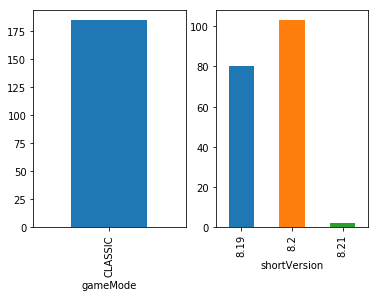

In [19]:
fig, axs = plt.subplots(1,2)
df.groupby(['gameMode'])['gameId'].nunique().plot(kind='bar', ax=axs[0])
df.sort_values(by='date').groupby(['shortVersion'])['gameId'].nunique().plot(kind='bar', ax=axs[1])

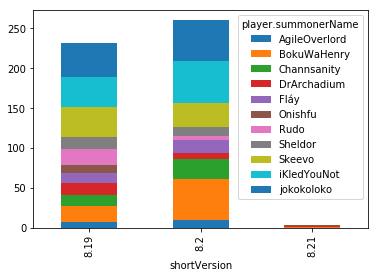

In [27]:
df.groupby(['shortVersion', 'player.summonerName'])['gameId'].nunique().unstack('player.summonerName').plot(kind='bar', stacked=True)

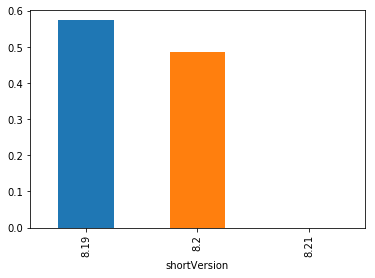

In [28]:
df.groupby(['shortVersion'])['win'].mean().plot(kind='bar')

In [29]:
dfp = pd.merge(df, df, on='gameId')[['gameId', 'player.summonerId_x', 'player.summonerId_y', 'win_x']]
dfp['player.summonerName_x'] = dfp['player.summonerId_x'].apply(nameFromSummonerId)
dfp['player.summonerName_y'] = dfp['player.summonerId_y'].apply(nameFromSummonerId)
dfp.head()

,gameId,player.summonerId_x,player.summonerId_y,win_x,player.summonerName_x,player.summonerName_y
0,2885438100,61079726,61079726,0,Skeevo,Skeevo
1,2885438100,61079726,73012371,0,Skeevo,jokokoloko
2,2885438100,61079726,64811789,0,Skeevo,Channsanity
3,2885438100,73012371,61079726,0,jokokoloko,Skeevo
4,2885438100,73012371,73012371,0,jokokoloko,jokokoloko


In [30]:
temp = dfp.groupby(['player.summonerId_x']).nunique()
temp

,gameId,player.summonerId_x,player.summonerId_y,win_x,player.summonerName_x,player.summonerName_y
player.summonerId_x,,,,,,
21411852,11,1,7,2,1,7
22928658,90,1,11,2,1,11
23037187,28,1,11,2,1,11
23455234,73,1,10,2,1,10
23924232,26,1,11,2,1,11
24132946,24,1,11,2,1,11
61079726,68,1,11,2,1,11
64739124,16,1,9,2,1,9
64811789,39,1,10,2,1,10


In [31]:
win_rate_pivot_table = pd.pivot_table(dfp, values='win_x', index=['player.summonerName_x'], columns=['player.summonerName_y'], aggfunc=[np.mean])
win_rate_pivot_table

mean                                      \
player.summonerName_y AgileOverlord BokuWaHenry Channsanity DrArchadium   
player.summonerName_x                                                     
AgileOverlord              0.375000    0.500000    0.333333    1.000000   
BokuWaHenry                0.500000    0.506849    0.583333    0.500000   
Channsanity                0.333333    0.583333    0.512821    0.666667   
DrArchadium                1.000000    0.500000    0.666667    0.500000   
Fláy                       0.000000    0.625000    0.583333    0.500000   
Onishfu                         NaN         NaN         NaN    0.428571   
Rudo                            NaN    0.666667    0.400000    0.333333   
Sheldor                    0.000000    0.500000    0.571429    0.555556   
Skeevo                     0.333333    0.565217    0.714286    0.615385   
iKledYouNot                0.416667    0.521739    0.608696    0.600000   
jokokoloko                 0.384615    0.516129    0.612903    0.600000   

                                                                         \
player.summonerName_y      Fláy   Onishfu      Rudo   Sheldor    Skeevo   
player.summonerName_x                                                     
AgileOverlord          0.000000       NaN       NaN  0.000000  0.333333   
BokuWaHenry            0.625000       NaN  0.666667  0.500000  0.565217   
Channsanity            0.583333       NaN  0.400000  0.571429  0.714286   
DrArchadium            0.500000  0.428571  0.333333  0.555556  0.615385   
Fláy                   0.535714  0.000000  0.428571  0.000000  0.764706   
Onishfu                0.000000  0.636364       NaN  0.600000  0.600000   
Rudo                   0.428571       NaN  0.615385  0.250000  0.500000   
Sheldor                0.000000  0.600000  0.250000  0.384615  0.466667   
Skeevo                 0.764706  0.600000  0.500000  0.466667  0.573529   
iKledYouNot            0.565217  0.000000  0.857143  0.444444  0.590909   
jokokoloko             0.576923  0.500000  0.692308  0.409091  0.596491   

                                              
player.summonerName_y iKledYouNot jokokoloko  
player.summonerName_x                         
AgileOverlord            0.416667   0.384615  
BokuWaHenry              0.521739   0.516129  
Channsanity              0.608696   0.612903  
DrArchadium              0.600000   0.600000  
Fláy                     0.565217   0.576923  
Onishfu                  0.000000   0.500000  
Rudo                     0.857143   0.692308  
Sheldor                  0.444444   0.409091  
Skeevo                   0.590909   0.596491  
iKledYouNot              0.522222   0.560606  
jokokoloko               0.560606   0.531915

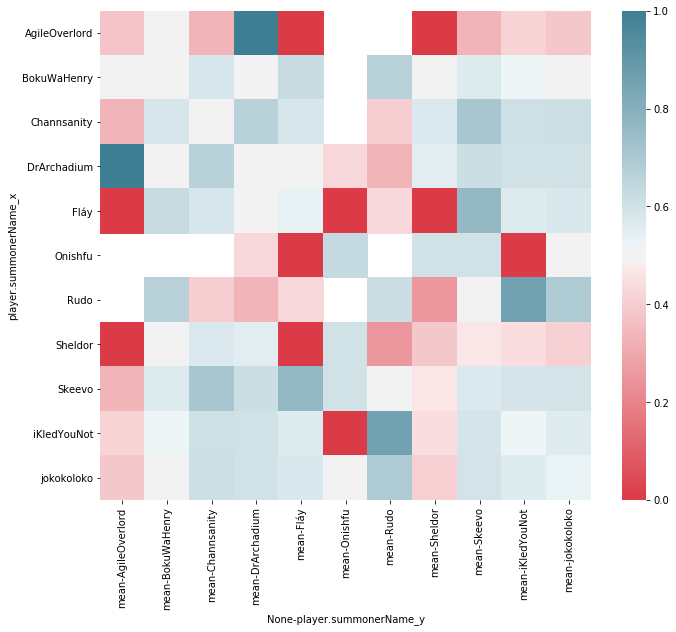

In [32]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(win_rate_pivot_table, cmap=cmap)

In [33]:
df_test = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

In [34]:
win_rate_pivot_table.corr()

mean                                      \
player.summonerName_y      AgileOverlord BokuWaHenry Channsanity DrArchadium   
     player.summonerName_y                                                     
mean AgileOverlord              1.000000   -0.470002    0.217526   -0.064729   
     BokuWaHenry               -0.470002    1.000000   -0.240328   -0.486653   
     Channsanity                0.217526   -0.240328    1.000000   -0.361395   
     DrArchadium               -0.064729   -0.486653   -0.361395    1.000000   
     Fláy                       0.277439    0.296280    0.622600   -0.220040   
     Onishfu                    0.122782   -0.488827    0.400112   -0.096771   
     Rudo                       0.129521    0.009124   -0.074061   -0.031900   
     Sheldor                    0.498530   -0.305506    0.587541   -0.368523   
     Skeevo                    -0.037678    0.379913    0.544365   -0.452072   
     iKledYouNot                0.350202    0.793494   -0.096841   -0.129557   
     jokokoloko                 0.331744    0.720215    0.226363   -0.593885   

                                                                              \
player.summonerName_y           Fláy   Onishfu      Rudo   Sheldor    Skeevo   
     player.summonerName_y                                                     
mean AgileOverlord          0.277439  0.122782  0.129521  0.498530 -0.037678   
     BokuWaHenry            0.296280 -0.488827  0.009124 -0.305506  0.379913   
     Channsanity            0.622600  0.400112 -0.074061  0.587541  0.544365   
     DrArchadium           -0.220040 -0.096771 -0.031900 -0.368523 -0.452072   
     Fláy                   1.000000 -0.400968  0.492336  0.226062  0.576975   
     Onishfu               -0.400968  1.000000 -0.457420  0.626513 -0.642716   
     Rudo                   0.492336 -0.457420  1.000000  0.024589 -0.091223   
     Sheldor                0.226062  0.626513  0.024589  1.000000  0.279591   
     Skeevo                 0.576975 -0.642716 -0.091223  0.279591  1.000000   
     iKledYouNot            0.615042 -0.387358  0.142299 -0.224412  0.083097   
     jokokoloko             0.700733 -0.411178  0.212046  0.228565  0.569812   

                                                   
player.summonerName_y      iKledYouNot jokokoloko  
     player.summonerName_y                         
mean AgileOverlord            0.350202   0.331744  
     BokuWaHenry              0.793494   0.720215  
     Channsanity             -0.096841   0.226363  
     DrArchadium             -0.129557  -0.593885  
     Fláy                     0.615042   0.700733  
     Onishfu                 -0.387358  -0.411178  
     Rudo                     0.142299   0.212046  
     Sheldor                 -0.224412   0.228565  
     Skeevo                   0.083097   0.569812  
     iKledYouNot              1.000000   0.622219  
     jokokoloko               0.622219   1.000000

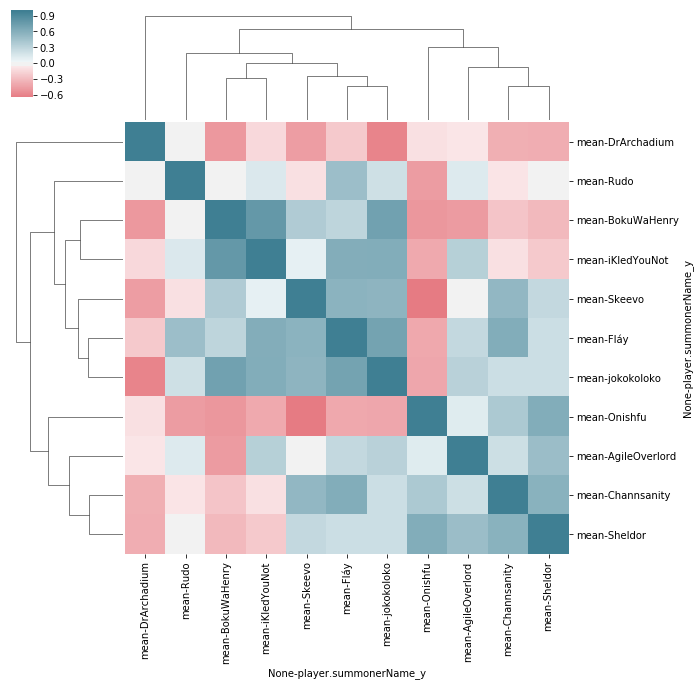

In [35]:
sns.clustermap(win_rate_pivot_table.corr(), center=0, cmap=cmap)

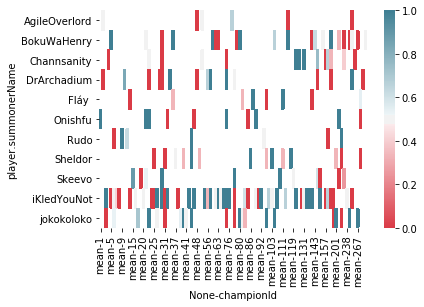

In [36]:
# dfp = pd.merge(df, df, on='gameId')[['gameId', 'player.summonerId_x', 'player.summonerId', 'win_x']]
dfp = pd.pivot_table(
    df[['player.summonerName', 'championId', 'win']], 
    values='win', 
    index=['player.summonerName'], 
    columns=['championId'], 
    aggfunc=[np.mean]
)


# dfp['player.summonerName_x'] = dfp['player.summonerId_x'].apply(nameFromSummonerId)
# dfp['player.summonerName_y'] = dfp['player.summonerId_y'].apply(nameFromSummonerId)
sns.heatmap(dfp, cmap=cmap)

In [23]:
champions = pd.read_json('http://ddragon.leagueoflegends.com/cdn/6.24.1/data/en_US/champion.json')
champions.head()

,type,format,version,data
Aatrox,champion,standAloneComplex,6.24.1,"{'version': '6.24.1', 'id': 'Aatrox', 'key': '..."
Ahri,champion,standAloneComplex,6.24.1,"{'version': '6.24.1', 'id': 'Ahri', 'key': '10..."
Akali,champion,standAloneComplex,6.24.1,"{'version': '6.24.1', 'id': 'Akali', 'key': '8..."
Alistar,champion,standAloneComplex,6.24.1,"{'version': '6.24.1', 'id': 'Alistar', 'key': ..."
Amumu,champion,standAloneComplex,6.24.1,"{'version': '6.24.1', 'id': 'Amumu', 'key': '3..."


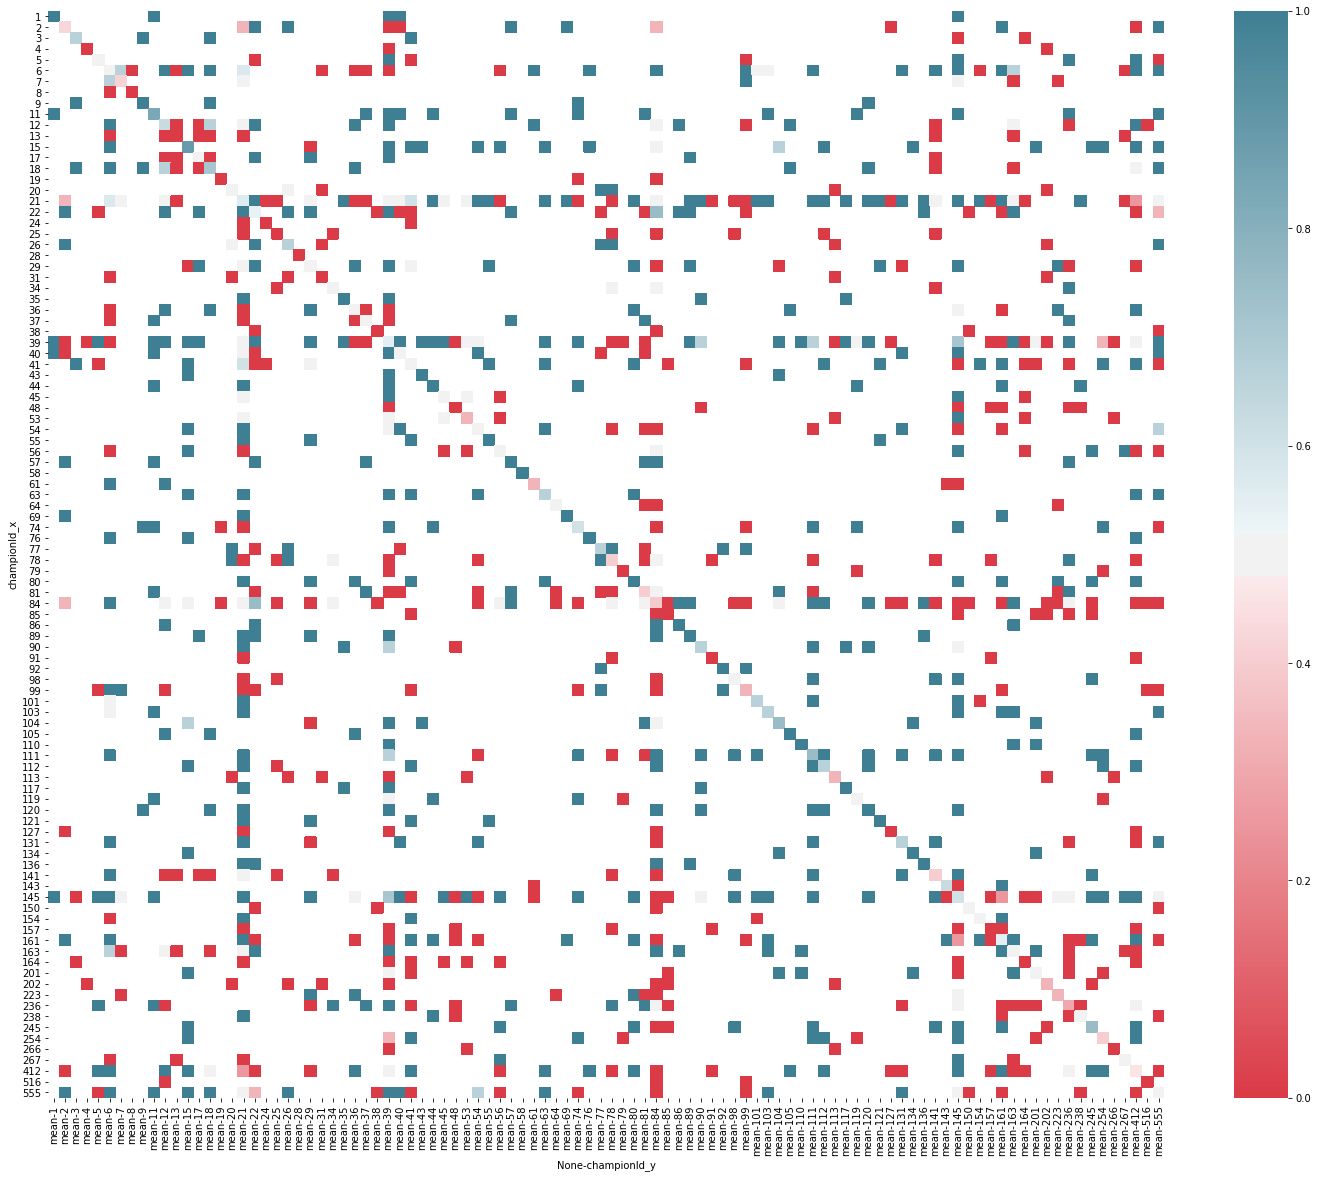

In [37]:
f, ax = plt.subplots(figsize=(25, 20))
dfp = pd.merge(df, df, on='gameId')[['gameId', 'championId_x', 'championId_y', 'win_x']]
# dfp['player.summonerName_x'] = dfp['player.summonerId_x'].apply(nameFromSummonerId)
# dfp['player.summonerName_y'] = dfp['player.summonerId_y'].apply(nameFromSummonerId)
win_rate_pivot_table = pd.pivot_table(dfp, values='win_x', index=['championId_x'], columns=['championId_y'], aggfunc=[np.mean])
sns.heatmap(win_rate_pivot_table, cmap=cmap)

In [38]:
df_normal[df_normal['player.summonerName'] == 'Skeevo'][['win']].describe()
df_normal[['gameCreation']].describe()

,gameCreation
count,287
unique,77
top,2018-10-18 04:58:51.047000
freq,5
first,2018-10-01 00:59:15.387000
last,2018-10-24 22:44:03.186000


In [39]:
df_normal[df_normal['player.summonerName'] == 'Skeevo'].groupby(['gameId']).filter(lambda x: len(x) == 1).count()

gameCreation                          46
gameDuration                          46
gameId                                46
gameMode                              46
gameType                              46
gameVersion                           46
mapId                                 46
platformId                            46
queueId                               46
seasonId                              46
date                                  46
shortVersion                          46
participantId                         46
player.accountId                      46
player.currentAccountId               46
player.currentPlatformId              46
player.matchHistoryUri                46
player.platformId                     46
player.profileIcon                    46
player.summonerId                     46
player.summonerName                   46
championId                            46
highestAchievedSeasonTier             46
spell1Id                              46
spell2Id        

In [76]:
temp = df.groupby(
    ['gameId']
).filter(
    lambda x: len(x) >= 4
)[[
    'gameId', 
    'player.summonerName', 
    'win'
]].groupby(['gameId']).agg({
    'player.summonerName': lambda x: tuple(x),
    'win': ['max', 'count'],
})
def flatten_cols(df):
    df.columns = [
        '_'.join(tuple(map(str, t))).rstrip('_') 
        for t in df.columns.values
        ]
    return df
flatten_cols(temp).reset_index().groupby('player.summonerName_<lambda>').agg({
    'win_max': 'mean',
    'win_count': 'max'
})

,win_max,win_count
player.summonerName_<lambda>,,
"(Sheldor, jokokoloko, AgileOverlord, Channsanity)",0.000000,4
"(Sheldor, jokokoloko, DrArchadium, iKledYouNot, Channsanity)",1.000000,5
"(Sheldor, jokokoloko, Fláy , iKledYouNot)",0.000000,4
"(Sheldor, jokokoloko, Fláy , iKledYouNot, Channsanity)",0.000000,5
"(Sheldor, jokokoloko, Rudo, BokuWaHenry, Channsanity)",1.000000,5
"(Sheldor, jokokoloko, Rudo, DrArchadium)",0.000000,4
"(Skeevo, AgileOverlord, iKledYouNot, Channsanity)",0.500000,4
"(Skeevo, Sheldor, DrArchadium, BokuWaHenry)",1.000000,4
"(Skeevo, Sheldor, jokokoloko, AgileOverlord, iKledYouNot)",0.000000,5


In [80]:
df_test = df.groupby(
    ['gameId'], as_index=False
).filter(
    lambda x: len(x) >= 3
)[[
    'gameId', 'player.summonerName', 'win'
]]
print('length', len(df_test.gameId.unique()))
df_test.head()

length 95


,gameId,player.summonerName,win
2,2885438100,Skeevo,0
3,2885438100,jokokoloko,0
4,2885438100,Channsanity,0
12,2884170615,Skeevo,1
13,2884170615,jokokoloko,1


In [84]:
df_groups = df_test.groupby(
    ['gameId'], as_index=False
).agg({
    'player.summonerName': [
        lambda x: tuple(x),
        'count'
    ],
    'win': 'max'
})
df_groups = flatten_cols(df_groups).reset_index()
df_groups.head()

,index,gameId,player.summonerName_<lambda>,player.summonerName_count,win_max
0,0,2878055669,"(Skeevo, Sheldor, jokokoloko, Rudo)",4,0
1,1,2878095821,"(Skeevo, Sheldor, jokokoloko, Rudo, Fláy )",5,0
2,2,2878107673,"(Skeevo, jokokoloko, Rudo, Fláy , iKledYouNot)",5,1
3,3,2878153565,"(Skeevo, jokokoloko, Rudo, Fláy , iKledYouNot)",5,1
4,4,2878719253,"(Skeevo, Sheldor, jokokoloko, AgileOverlord, i...",5,0


In [100]:
df_groups.groupby(['player.summonerName_<lambda>']).agg({'gameId': 'count', 'win_max': 'mean'})

,gameId,win_max
player.summonerName_<lambda>,,
"(Rudo, DrArchadium, Channsanity)",1,0.000000
"(Rudo, Fláy , Channsanity)",2,0.000000
"(Sheldor, jokokoloko, AgileOverlord, Channsanity)",2,0.000000
"(Sheldor, jokokoloko, BokuWaHenry)",1,0.000000
"(Sheldor, jokokoloko, DrArchadium, iKledYouNot, Channsanity)",1,1.000000
"(Sheldor, jokokoloko, Fláy , iKledYouNot)",1,0.000000
"(Sheldor, jokokoloko, Fláy , iKledYouNot, Channsanity)",1,0.000000
"(Sheldor, jokokoloko, Rudo, BokuWaHenry, Channsanity)",1,1.000000
"(Sheldor, jokokoloko, Rudo, DrArchadium)",1,0.000000
